In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from shapely.geometry import Point
from shapely.geometry import MultiPoint
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import box
from descartes.patch import PolygonPatch
import ipywidgets as widgets
import ipywidgets.widgets.interaction
#from ipywidgets import interactive, fixed
from ipywidgets import *
import random
import pandas as pd

import re

from shapely import geometry
import pickle
import time

#from ipyparallel import Client

from shapely import affinity
from shapely.geometry import LineString
import warnings
warnings.simplefilter('ignore', np.RankWarning)


import gc
gc.enable()

In [2]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-AMP/')

# import sys, importlib
# # importlib.reload(sys.modules['DataManagers'])
# # importlib.reload(sys.modules['TrackingFunctions'])
# importlib.reload(sys.modules['PlottingFunctions'])
# # from DataManagers import *
# # from TrackingFunctions import *
# from PlottingFunctions import *

In [3]:
pwd

'/home/esb/Projects/uJ/local/experiments/HT-LB'

In [4]:
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/charly/Lab/Projects/uJ/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')

#from readroi import *
from DataManagers import *
from DataStructs import *
from AnalysisFunctions import *
from TrackingFunctions import *
from PlottingFunctions import *


Importing readroi
DataStructs...loaded!
DataManagers...loaded!
> Analysis Functions loaded
TrackingFunctions... loaded!
PlottingFunctions... loaded!


## Experiment Parameters

In [5]:


rootDir="../../data_sample/HT-LB/"
expeLabel="HT-LB"
trap_list="xy02,xy03,xy04,xy05,xy06,xy10".split(",")  
trap_list="xy03,xy03-1".split(",")  
#trap_list="xy03-1".split(",")  

#trap="xy15" 

figxlim=1000
figylim=512
flims=(figxlim,figylim)


data_type_list=["relativeIntensity","normData","normDataN"] 
data_type="normData"
#Input files

for trap in trap_list:
    #Input files
    dirNameROIs=rootDir+"data_rois/"+trap+"/GFP/"
    #dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    
    #Output
    dirNameCELLS=rootDir+'data_cells/'+trap+'/'+data_type+'/'
   

    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+'/'+data_type+'/'
    


    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    if not os.path.exists(dirNameTRACKEDCELLS_IMGS):
        print("making dir figures...")
        os.makedirs(dirNameTRACKEDCELLS_IMGS)
   
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    if not os.path.exists(dirNameDATALINEAGES):
        print("making dir lineages...")
        os.makedirs(dirNameDATALINEAGES)

#toFile=False
toFile=True
    

frame2min=5

notcaptured_start=866
notcaptured_end=866


frame_experiment_start=1;
frame_signal_start=int(865-(frame_experiment_start-1)/2)
frame_signal_end=int(865-(frame_experiment_start-1)/2)
frame_experiment_end=int(865-(frame_experiment_start-1)/2)

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min


frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))



#print(dataPath)
#if not os.path.exists(figurePathDM) and toFile:
#    os.mkdir(figurePathDM)




Frames:  range(1, 866)	 0.0->72.0 hours
t_experiment_start=0	(0.0h)
t_experiment_end=4320	(72.0h)


### Load tracked cells

In [6]:

max_frames=-1

trap_tracked_cells=[]
for trap in trap_list:
    print(trap)
    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+"/"+data_type+"/"
    
    tracked_cells=load_cells(dirNameTRACKEDCELLS,max_frames)
    print(len(tracked_cells))
    trap_tracked_cells.append(tracked_cells)

xy03
864: Loading HT-LB_xy03_865.pkl
865
xy03-1
864: Loading HT-LB_xy03-1_865.pkl
865


# Make the lineages

In [7]:
trap_lineages=[]
for i,trap in enumerate(trap_list):
    #if i==0: continue
    print(i,trap)
    tracked_cells=trap_tracked_cells[i]
    this_lineages=make_cellLineages_all(tracked_cells,frame_experiment_start)
    trap_lineages.append(this_lineages)
    print(len(this_lineages))
    

0 xy03
Making lineages of 57 cells out of 57 from frame 864 
Making lineages of 6 cells out of 58 from frame 863 403 	 771	 438 105693	 507 174853 455 122731 	 856 	 837671 	 504855 	 754
Making lineages of 1 cells out of 56 from frame 862 
Making lineages of 3 cells out of 55 from frame 861 
Making lineages of 4 cells out of 57 from frame 860 
Making lineages of 3 cells out of 55 from frame 859 
Making lineages of 2 cells out of 54 from frame 858 
Making lineages of 4 cells out of 56 from frame 857 
Making lineages of 3 cells out of 55 from frame 856 
Making lineages of 4 cells out of 57 from frame 855 
Making lineages of 4 cells out of 61 from frame 854 
Making lineages of 1 cells out of 61 from frame 853 
Making lineages of 5 cells out of 61 from frame 852 
Making lineages of 3 cells out of 61 from frame 851 
Making lineages of 4 cells out of 60 from frame 850 
Making lineages of 2 cells out of 57 from frame 849 
Making lineages of 2 cells out of 57 from frame 848 
Making lineages o

Making lineages of 8 cells out of 73 from frame 711 
Making lineages of 3 cells out of 68 from frame 710 
Making lineages of 5 cells out of 68 from frame 709 
Making lineages of 2 cells out of 66 from frame 708 
Making lineages of 2 cells out of 67 from frame 707 
Making lineages of 3 cells out of 67 from frame 706 
Making lineages of 2 cells out of 66 from frame 705 
Making lineages of 4 cells out of 68 from frame 704 
Making lineages of 3 cells out of 71 from frame 703 
Making lineages of 11 cells out of 73 from frame 702 
Making lineages of 5 cells out of 69 from frame 701 
Making lineages of 5 cells out of 68 from frame 700 
Making lineages of 4 cells out of 68 from frame 699 
Making lineages of 6 cells out of 68 from frame 698 
Making lineages of 4 cells out of 68 from frame 697 
Making lineages of 4 cells out of 69 from frame 696 
Making lineages of 3 cells out of 66 from frame 695 
Making lineages of 3 cells out of 68 from frame 694 
Making lineages of 0 cells out of 65 from fra

Making lineages of 7 cells out of 85 from frame 557 
Making lineages of 6 cells out of 84 from frame 556 
Making lineages of 8 cells out of 86 from frame 555 
Making lineages of 5 cells out of 88 from frame 554 
Making lineages of 4 cells out of 82 from frame 553 
Making lineages of 7 cells out of 78 from frame 552 
Making lineages of 5 cells out of 80 from frame 551 
Making lineages of 5 cells out of 82 from frame 550 
Making lineages of 2 cells out of 82 from frame 549 
Making lineages of 9 cells out of 85 from frame 548 
Making lineages of 6 cells out of 87 from frame 547 
Making lineages of 9 cells out of 91 from frame 546 
Making lineages of 7 cells out of 93 from frame 545 
Making lineages of 5 cells out of 90 from frame 544 
Making lineages of 5 cells out of 89 from frame 543 
Making lineages of 6 cells out of 85 from frame 542 
Making lineages of 3 cells out of 79 from frame 541 
Making lineages of 5 cells out of 79 from frame 540 
Making lineages of 5 cells out of 79 from fram

Making lineages of 12 cells out of 101 from frame 403 
Making lineages of 3 cells out of 97 from frame 402 
Making lineages of 5 cells out of 95 from frame 401 
Making lineages of 8 cells out of 99 from frame 400 
Making lineages of 4 cells out of 97 from frame 399 
Making lineages of 2 cells out of 96 from frame 398 
Making lineages of 5 cells out of 97 from frame 397 
Making lineages of 7 cells out of 100 from frame 396 
Making lineages of 8 cells out of 102 from frame 395 
Making lineages of 9 cells out of 104 from frame 394 
Making lineages of 7 cells out of 105 from frame 393 
Making lineages of 4 cells out of 94 from frame 392 
Making lineages of 12 cells out of 98 from frame 391 
Making lineages of 4 cells out of 97 from frame 390 
Making lineages of 7 cells out of 99 from frame 389 
Making lineages of 13 cells out of 106 from frame 388 
Making lineages of 5 cells out of 104 from frame 387 
Making lineages of 6 cells out of 105 from frame 386 
Making lineages of 6 cells out of 1

Making lineages of 7 cells out of 111 from frame 252 
Making lineages of 11 cells out of 118 from frame 251 
Making lineages of 7 cells out of 119 from frame 250 
Making lineages of 8 cells out of 119 from frame 249 
Making lineages of 6 cells out of 117 from frame 248 
Making lineages of 10 cells out of 125 from frame 247 
Making lineages of 7 cells out of 117 from frame 246 
Making lineages of 12 cells out of 117 from frame 245 
Making lineages of 5 cells out of 110 from frame 244 
Making lineages of 9 cells out of 117 from frame 243 
Making lineages of 6 cells out of 114 from frame 242 
Making lineages of 9 cells out of 110 from frame 241 
Making lineages of 9 cells out of 110 from frame 240 
Making lineages of 6 cells out of 111 from frame 239 
Making lineages of 3 cells out of 110 from frame 238 
Making lineages of 10 cells out of 116 from frame 237 
Making lineages of 10 cells out of 119 from frame 236 
Making lineages of 4 cells out of 119 from frame 235 
Making lineages of 4 ce

Making lineages of 9 cells out of 115 from frame 100 
Making lineages of 13 cells out of 118 from frame 99 
Making lineages of 10 cells out of 123 from frame 98 
Making lineages of 6 cells out of 121 from frame 97 
Making lineages of 10 cells out of 120 from frame 96 
Making lineages of 12 cells out of 114 from frame 95 
Making lineages of 6 cells out of 113 from frame 94 
Making lineages of 11 cells out of 118 from frame 93 
Making lineages of 5 cells out of 116 from frame 92 
Making lineages of 3 cells out of 111 from frame 91 
Making lineages of 11 cells out of 113 from frame 90 
Making lineages of 10 cells out of 116 from frame 89 
Making lineages of 5 cells out of 114 from frame 88 
Making lineages of 15 cells out of 123 from frame 87 
Making lineages of 10 cells out of 126 from frame 86 
Making lineages of 10 cells out of 119 from frame 85 
Making lineages of 8 cells out of 124 from frame 84 
Making lineages of 10 cells out of 121 from frame 83 
Making lineages of 11 cells out of

Making lineages of 1 cells out of 10 from frame 773 
Making lineages of 0 cells out of 9 from frame 772 
Making lineages of 1 cells out of 9 from frame 771 
Making lineages of 0 cells out of 9 from frame 770 
Making lineages of 1 cells out of 10 from frame 769 
Making lineages of 1 cells out of 10 from frame 768 
Making lineages of 0 cells out of 10 from frame 767 
Making lineages of 2 cells out of 10 from frame 766 
Making lineages of 0 cells out of 10 from frame 765 
Making lineages of 2 cells out of 11 from frame 764 
Making lineages of 1 cells out of 10 from frame 763 
Making lineages of 0 cells out of 10 from frame 762 
Making lineages of 0 cells out of 10 from frame 761 
Making lineages of 0 cells out of 8 from frame 760 
Making lineages of 2 cells out of 9 from frame 759 
Making lineages of 1 cells out of 9 from frame 758 
Making lineages of 1 cells out of 8 from frame 757 
Making lineages of 0 cells out of 7 from frame 756 
Making lineages of 2 cells out of 9 from frame 755 
Ma

Making lineages of 1 cells out of 9 from frame 690 
Making lineages of 1 cells out of 10 from frame 689 
Making lineages of 1 cells out of 11 from frame 688 
Making lineages of 0 cells out of 11 from frame 687 
Making lineages of 0 cells out of 11 from frame 686 
Making lineages of 1 cells out of 11 from frame 685 
Making lineages of 2 cells out of 11 from frame 684 
Making lineages of 0 cells out of 10 from frame 683 
Making lineages of 2 cells out of 10 from frame 682 
Making lineages of 0 cells out of 8 from frame 681 
Making lineages of 1 cells out of 9 from frame 680 
Making lineages of 1 cells out of 10 from frame 679 
Making lineages of 1 cells out of 10 from frame 678 
Making lineages of 1 cells out of 11 from frame 677 
Making lineages of 1 cells out of 11 from frame 676 
Making lineages of 1 cells out of 12 from frame 675 
Making lineages of 1 cells out of 12 from frame 674 
Making lineages of 3 cells out of 12 from frame 673 
Making lineages of 1 cells out of 12 from frame 6

Making lineages of 0 cells out of 10 from frame 615 
Making lineages of 0 cells out of 9 from frame 614 
Making lineages of 1 cells out of 9 from frame 613 
Making lineages of 3 cells out of 11 from frame 612 
Making lineages of 1 cells out of 10 from frame 611 
Making lineages of 3 cells out of 10 from frame 610 
Making lineages of 0 cells out of 7 from frame 609 
Making lineages of 1 cells out of 8 from frame 608 
Making lineages of 0 cells out of 8 from frame 607 
Making lineages of 1 cells out of 8 from frame 606 
Making lineages of 1 cells out of 9 from frame 605 
Making lineages of 2 cells out of 10 from frame 604 
Making lineages of 0 cells out of 10 from frame 603 
Making lineages of 0 cells out of 10 from frame 602 
Making lineages of 1 cells out of 10 from frame 601 
Making lineages of 1 cells out of 10 from frame 600 
Making lineages of 2 cells out of 9 from frame 599 
Making lineages of 0 cells out of 9 from frame 598 
Making lineages of 0 cells out of 6 from frame 597 
Mak

Making lineages of 1 cells out of 9 from frame 547 
Making lineages of 1 cells out of 10 from frame 546 
Making lineages of 0 cells out of 10 from frame 545 
Making lineages of 1 cells out of 11 from frame 544 
Making lineages of 1 cells out of 11 from frame 543 
Making lineages of 1 cells out of 12 from frame 542 
Making lineages of 0 cells out of 9 from frame 541 
Making lineages of 1 cells out of 10 from frame 540 
Making lineages of 0 cells out of 8 from frame 539 
Making lineages of 1 cells out of 8 from frame 538 
Making lineages of 1 cells out of 9 from frame 537 
Making lineages of 2 cells out of 10 from frame 536 
Making lineages of 1 cells out of 11 from frame 535 
Making lineages of 1 cells out of 12 from frame 534 
Making lineages of 1 cells out of 11 from frame 533 
Making lineages of 1 cells out of 10 from frame 532 
Making lineages of 1 cells out of 10 from frame 531 
Making lineages of 0 cells out of 10 from frame 530 
Making lineages of 1 cells out of 8 from frame 529 

Making lineages of 0 cells out of 9 from frame 466 
Making lineages of 1 cells out of 10 from frame 465 
Making lineages of 0 cells out of 10 from frame 464 
Making lineages of 0 cells out of 10 from frame 463 
Making lineages of 2 cells out of 10 from frame 462 
Making lineages of 0 cells out of 9 from frame 461 
Making lineages of 2 cells out of 10 from frame 460 
Making lineages of 0 cells out of 9 from frame 459 
Making lineages of 0 cells out of 8 from frame 458 
Making lineages of 0 cells out of 8 from frame 457 
Making lineages of 3 cells out of 9 from frame 456 
Making lineages of 0 cells out of 9 from frame 455 
Making lineages of 1 cells out of 10 from frame 454 
Making lineages of 0 cells out of 10 from frame 453 
Making lineages of 0 cells out of 10 from frame 452 
Making lineages of 0 cells out of 10 from frame 451 
Making lineages of 2 cells out of 11 from frame 450 
Making lineages of 1 cells out of 9 from frame 449 
Making lineages of 0 cells out of 8 from frame 448 
Ma

Making lineages of 1 cells out of 11 from frame 421 
Making lineages of 1 cells out of 11 from frame 420 
Making lineages of 0 cells out of 11 from frame 419 
Making lineages of 1 cells out of 12 from frame 418 
Making lineages of 0 cells out of 10 from frame 417 
Making lineages of 1 cells out of 11 from frame 416 
Making lineages of 2 cells out of 10 from frame 415 
Making lineages of 0 cells out of 10 from frame 414 
Making lineages of 1 cells out of 11 from frame 413 
Making lineages of 0 cells out of 11 from frame 412 
Making lineages of 0 cells out of 11 from frame 411 
Making lineages of 0 cells out of 10 from frame 410 
Making lineages of 1 cells out of 11 from frame 409 
Making lineages of 1 cells out of 12 from frame 408 
Making lineages of 1 cells out of 12 from frame 407 
Making lineages of 1 cells out of 11 from frame 406 
Making lineages of 2 cells out of 13 from frame 405 
Making lineages of 1 cells out of 14 from frame 404 
Making lineages of 1 cells out of 12 from fram

Making lineages of 1 cells out of 13 from frame 365 
Making lineages of 0 cells out of 10 from frame 364 
Making lineages of 2 cells out of 11 from frame 363 
Making lineages of 1 cells out of 11 from frame 362 
Making lineages of 1 cells out of 11 from frame 361 
Making lineages of 2 cells out of 11 from frame 360 
Making lineages of 1 cells out of 12 from frame 359 
Making lineages of 0 cells out of 11 from frame 358 
Making lineages of 1 cells out of 12 from frame 357 
Making lineages of 1 cells out of 11 from frame 356 
Making lineages of 1 cells out of 11 from frame 355 
Making lineages of 2 cells out of 12 from frame 354 
Making lineages of 0 cells out of 10 from frame 353 
Making lineages of 0 cells out of 8 from frame 352 
Making lineages of 2 cells out of 9 from frame 351 
Making lineages of 0 cells out of 9 from frame 350 
Making lineages of 0 cells out of 9 from frame 349 
Making lineages of 1 cells out of 10 from frame 348 
Making lineages of 0 cells out of 10 from frame 34

Making lineages of 2 cells out of 10 from frame 323 
Making lineages of 2 cells out of 11 from frame 322 
Making lineages of 2 cells out of 12 from frame 321 
Making lineages of 0 cells out of 11 from frame 320 
Making lineages of 0 cells out of 9 from frame 319 
Making lineages of 3 cells out of 11 from frame 318 
Making lineages of 1 cells out of 11 from frame 317 
Making lineages of 1 cells out of 11 from frame 316 
Making lineages of 0 cells out of 8 from frame 315 
Making lineages of 0 cells out of 8 from frame 314 
Making lineages of 2 cells out of 10 from frame 313 
Making lineages of 0 cells out of 9 from frame 312 
Making lineages of 1 cells out of 10 from frame 311 
Making lineages of 1 cells out of 11 from frame 310 
Making lineages of 0 cells out of 11 from frame 309 
Making lineages of 2 cells out of 11 from frame 308 
Making lineages of 0 cells out of 11 from frame 307 
Making lineages of 3 cells out of 12 from frame 306 
Making lineages of 0 cells out of 9 from frame 305

Making lineages of 0 cells out of 11 from frame 282 
Making lineages of 1 cells out of 9 from frame 281 
Making lineages of 0 cells out of 9 from frame 280 
Making lineages of 1 cells out of 10 from frame 279 
Making lineages of 2 cells out of 10 from frame 278 
Making lineages of 0 cells out of 10 from frame 277 
Making lineages of 0 cells out of 10 from frame 276 
Making lineages of 0 cells out of 10 from frame 275 
Making lineages of 1 cells out of 10 from frame 274 
Making lineages of 1 cells out of 9 from frame 273 
Making lineages of 0 cells out of 7 from frame 272 
Making lineages of 0 cells out of 7 from frame 271 
Making lineages of 1 cells out of 8 from frame 270 
Making lineages of 2 cells out of 9 from frame 269 
Making lineages of 0 cells out of 9 from frame 268 
Making lineages of 0 cells out of 8 from frame 267 
Making lineages of 2 cells out of 9 from frame 266 
Making lineages of 2 cells out of 10 from frame 265 
Making lineages of 0 cells out of 10 from frame 264 
Mak

Making lineages of 1 cells out of 11 from frame 236 
Making lineages of 1 cells out of 12 from frame 235 
Making lineages of 0 cells out of 10 from frame 234 
Making lineages of 0 cells out of 9 from frame 233 
Making lineages of 1 cells out of 9 from frame 232 
Making lineages of 1 cells out of 9 from frame 231 
Making lineages of 0 cells out of 8 from frame 230 
Making lineages of 1 cells out of 8 from frame 229 
Making lineages of 0 cells out of 8 from frame 228 
Making lineages of 0 cells out of 8 from frame 227 
Making lineages of 2 cells out of 10 from frame 226 
Making lineages of 0 cells out of 10 from frame 225 
Making lineages of 0 cells out of 10 from frame 224 
Making lineages of 1 cells out of 10 from frame 223 
Making lineages of 1 cells out of 11 from frame 222 
Making lineages of 0 cells out of 9 from frame 221 
Making lineages of 0 cells out of 8 from frame 220 
Making lineages of 1 cells out of 8 from frame 219 
Making lineages of 0 cells out of 7 from frame 218 
Maki

Making lineages of 0 cells out of 9 from frame 192 
Making lineages of 0 cells out of 8 from frame 191 
Making lineages of 1 cells out of 9 from frame 190 
Making lineages of 1 cells out of 9 from frame 189 
Making lineages of 1 cells out of 10 from frame 188 
Making lineages of 0 cells out of 10 from frame 187 
Making lineages of 0 cells out of 10 from frame 186 
Making lineages of 1 cells out of 11 from frame 185 
Making lineages of 0 cells out of 11 from frame 184 
Making lineages of 3 cells out of 12 from frame 183 
Making lineages of 2 cells out of 13 from frame 182 
Making lineages of 0 cells out of 13 from frame 181 
Making lineages of 0 cells out of 12 from frame 180 
Making lineages of 2 cells out of 12 from frame 179 
Making lineages of 2 cells out of 12 from frame 178 
Making lineages of 0 cells out of 9 from frame 177 
Making lineages of 1 cells out of 10 from frame 176 
Making lineages of 0 cells out of 10 from frame 175 
Making lineages of 0 cells out of 10 from frame 174

Making lineages of 0 cells out of 10 from frame 162 
Making lineages of 0 cells out of 10 from frame 161 
Making lineages of 2 cells out of 12 from frame 160 
Making lineages of 0 cells out of 12 from frame 159 
Making lineages of 0 cells out of 12 from frame 158 
Making lineages of 1 cells out of 13 from frame 157 
Making lineages of 1 cells out of 14 from frame 156 
Making lineages of 1 cells out of 13 from frame 155 
Making lineages of 0 cells out of 13 from frame 154 
Making lineages of 0 cells out of 12 from frame 153 
Making lineages of 0 cells out of 12 from frame 152 
Making lineages of 0 cells out of 10 from frame 151 
Making lineages of 0 cells out of 9 from frame 150 
Making lineages of 1 cells out of 9 from frame 149 
Making lineages of 0 cells out of 9 from frame 148 
Making lineages of 2 cells out of 10 from frame 147 
Making lineages of 1 cells out of 11 from frame 146 
Making lineages of 0 cells out of 11 from frame 145 
Making lineages of 1 cells out of 12 from frame 1

Making lineages of 2 cells out of 12 from frame 115 
Making lineages of 1 cells out of 10 from frame 114 
Making lineages of 0 cells out of 7 from frame 113 
Making lineages of 1 cells out of 8 from frame 112 
Making lineages of 2 cells out of 10 from frame 111 
Making lineages of 1 cells out of 11 from frame 110 
Making lineages of 1 cells out of 12 from frame 109 
Making lineages of 0 cells out of 12 from frame 108 
Making lineages of 0 cells out of 12 from frame 107 
Making lineages of 2 cells out of 13 from frame 106 
Making lineages of 0 cells out of 13 from frame 105 
Making lineages of 0 cells out of 11 from frame 104 
Making lineages of 1 cells out of 10 from frame 103 
Making lineages of 1 cells out of 10 from frame 102 
Making lineages of 0 cells out of 8 from frame 101 
Making lineages of 1 cells out of 9 from frame 100 
Making lineages of 1 cells out of 10 from frame 99 
Making lineages of 0 cells out of 10 from frame 98 
Making lineages of 1 cells out of 10 from frame 97 


Making lineages of 2 cells out of 11 from frame 77 
Making lineages of 0 cells out of 11 from frame 76 
Making lineages of 3 cells out of 12 from frame 75 
Making lineages of 0 cells out of 12 from frame 74 
Making lineages of 3 cells out of 13 from frame 73 
Making lineages of 1 cells out of 11 from frame 72 
Making lineages of 0 cells out of 10 from frame 71 
Making lineages of 1 cells out of 10 from frame 70 
Making lineages of 0 cells out of 10 from frame 69 
Making lineages of 1 cells out of 11 from frame 68 
Making lineages of 1 cells out of 11 from frame 67 
Making lineages of 1 cells out of 11 from frame 66 
Making lineages of 0 cells out of 11 from frame 65 
Making lineages of 1 cells out of 12 from frame 64 
Making lineages of 0 cells out of 12 from frame 63 
Making lineages of 1 cells out of 12 from frame 62 
Making lineages of 2 cells out of 13 from frame 61 
Making lineages of 0 cells out of 12 from frame 60 
Making lineages of 0 cells out of 12 from frame 59 
Making linea

Making lineages of 0 cells out of 15 from frame 45 
Making lineages of 1 cells out of 16 from frame 44 
Making lineages of 2 cells out of 16 from frame 43 
Making lineages of 2 cells out of 17 from frame 42 
Making lineages of 2 cells out of 17 from frame 41 
Making lineages of 2 cells out of 17 from frame 40 
Making lineages of 0 cells out of 14 from frame 39 
Making lineages of 0 cells out of 13 from frame 38 
Making lineages of 0 cells out of 13 from frame 37 
Making lineages of 1 cells out of 14 from frame 36 
Making lineages of 0 cells out of 13 from frame 35 
Making lineages of 1 cells out of 14 from frame 34 
Making lineages of 1 cells out of 15 from frame 33 
Making lineages of 2 cells out of 16 from frame 32 
Making lineages of 0 cells out of 16 from frame 31 
Making lineages of 1 cells out of 17 from frame 30 
Making lineages of 1 cells out of 18 from frame 29 
Making lineages of 1 cells out of 17 from frame 28 
Making lineages of 2 cells out of 16 from frame 27 
Making linea

Making lineages of 0 cells out of 14 from frame 9 
Making lineages of 1 cells out of 14 from frame 8 
Making lineages of 1 cells out of 14 from frame 7 
Making lineages of 1 cells out of 14 from frame 6 
Making lineages of 2 cells out of 15 from frame 5 
Making lineages of 1 cells out of 16 from frame 4 
Making lineages of 2 cells out of 14 from frame 3 
Making lineages of 2 cells out of 16 from frame 2 
Making lineages of 1 cells out of 14 from frame 1 
9095

Lineage complete!
725


### Export time-series

In [ ]:
max_frames=frame_experiment_end-frame_experiment_start
minFrames=max_frames-200

for i,trap in enumerate(trap_list):
    this_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'#+trap+"/"
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_all.csv"
    save_data_lineages(this_lineages,filename)
    print(len(this_lineages),"saved!")
    analysis_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_signal_end,"lineageID")
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_analysis.csv"
    save_data_lineages(analysis_lineages,filename)
    print(len(analysis_lineages),"saved!")
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_long.csv"
    save_data_lineages(long_lineages,filename)
    print(len(long_lineages),"saved!")

In [ ]:
for i,trap in enumerate(trap_list):
    
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    mpl.rcParams.update({'font.size': 14})
    data_labels={'GFP','DsRed','RelInt'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_timeseries_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_data(this_lineages, this_data_label, fileName)
        plt.show()







In [ ]:
   

    
mpl.rcParams.update({'font.size': 14})
data_labels={'RelInt'} #'GFP','DsRed',
data_labels={'GFP','DsRed','RelInt'}
for i,trap in enumerate(trap_list):
    #print(trap)
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #data_labels={'GFP','DsRed'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_poincare_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_poincare(this_lineages, this_data_label, fileName)
        plt.show()    

### Export Horizon Plots

In [ ]:

minFrames=700


num_levels=4




for i,trap in enumerate(trap_list):
    #print(trap)
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    
    this_lineages=trap_lineages[i]
    
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    #long_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_experiment_end,frame_experiment_start)
    #long_lineages=this_lineages
    print(len(long_lineages))
    fileName="%s%s_%s_horizons.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap)
    print(fileName)
    plot_relativeIntensity_Horizon(long_lineages, num_levels, fileName)
    plt.close()

## Load Data & Plot layer

In [8]:
def load_data_lineages(fileName):
    #df_lineages = pd.read_csv(fileName,dtype=object)
    df_lineages = pd.read_csv(fileName)
    print('Loading %s lineages from %s'%(len(df_lineages.lineageID.unique()), fileName))
    return df_lineages


In [9]:
trap_df_lineages=[]
trap_df_lineages_long=[]
for i,trap in enumerate(trap_list):
    #cell_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages_long=load_data_lineages(lineagesDataFile)
    trap_df_lineages_long.append(df_lineages_long)

Loading 168 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03_lineages_all.csv
Loading 8 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03_lineages_analysis.csv
Loading 15 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03-1_lineages_all.csv
Loading 1 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03-1_lineages_analysis.csv


### Draw ROIs + Data Overlay (export to PNG)  

101.993 581.114
105.21 629.2719999999998
99593


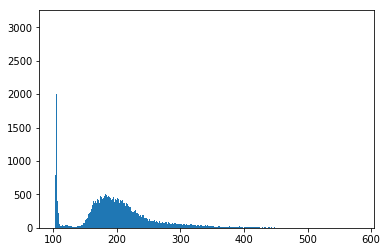

99593


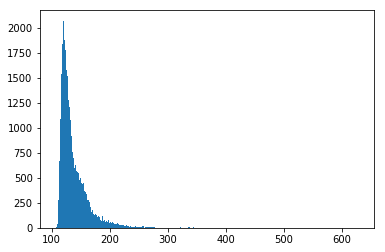

In [10]:
all_df_lineages=pd.concat(trap_df_lineages)
maxg=all_df_lineages["GFP"].max()
ming=all_df_lineages["GFP"].min()
maxr=all_df_lineages["DsRed"].max()
minr=all_df_lineages["DsRed"].min()
print(ming,maxg)
print(minr,maxr)
gb=np.linspace(float(ming),float(maxg),1000)
#gs=[float(x) for x in all_df_lineages["GFP"]]
gs=list(all_df_lineages["GFP"])
print(len(gs))
plt.hist(gs,bins=gb)

plt.show()
rb=np.linspace(float(minr),float(maxr),1000)
rs=list(all_df_lineages["DsRed"])
print(len(rs))
plt.hist(rs,bins=rb)

plt.show()



In [38]:
layer1 = {'channel':'GFP',  'minvalue':100, 'maxvalue':450, 'contour':True}
layer2 = {'channel':'DsRed','minvalue':100,'maxvalue':300,'contour':True}
layer3 = {'channel':'Mask','minvalue':100,'maxvalue':500,'contour':True}
layer4 = {'channel':'RelInt','minvalue':-.15,'maxvalue':np.pi+.15,'contour':True}
layer5 = {'channel':'Tracking','minvalue':0,'maxvalue':0,'contour':True}
layer6 = {'channel':'division','minvalue':0,'maxvalue':1,'contour':True}
layers=[layer1, layer2, layer3, layer4, layer5, layer6]
#layers=[layer4]

for i,trap in enumerate(trap_list[0:1]):
    cell_lineages=trap_lineages[i]
    df_lineages=trap_df_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #print(df_lineages.head())
    for layer in layers:
        print("Exporting layer %s"%(layer['channel']))
        dirNameIMAGEOVERLAY=dirNameTRACKEDCELLS_IMGS+layer['channel']+'/'
        if not os.path.exists(dirNameIMAGEOVERLAY):
            os.makedirs(dirNameIMAGEOVERLAY)

        for this_frame in list_frames:
            print(this_frame,end="\r")
            [trackIDs, trackPolys, trackData]=get_data_roi(cell_lineages, df_lineages, this_frame,layer['channel'])
            #print(trackIDs, "\n\t",trackData)
           
            fileNameIMAGEOVERLAY="%s/%s_%s_%s.png"%(dirNameIMAGEOVERLAY,expeLabel,trap,str(this_frame).zfill(3))

            draw_channel(this_frame, layer, trackIDs, trackPolys, trackData, fileNameIMAGEOVERLAY,flims)
            
        print()

../../data_sample/HT-LB/figures/traked_cells/xy03/
Exporting layer RelInt
865


In [25]:
list_frames2=list_frames[-3:]
list_frames2

array([863, 864, 865])